# Classification

Let's now build our first classification models. This is a template you can reuse when you'll be building your own models. 

## What you will learn in this course 🧐🧐

* Create logistic regressions using `sklearn`
* Create decision trees and random forests using `sklearn`
* Visualize your results with confusion matrix 
* Check feature importance 

## Step 1 - Preprocessing 🍳

As you already know, there is always a preprocessing step that includes: 

* Importing libraries 
* Importing data 
* Seperate target & feature variable 
* Split data into training and testing set
* Standardize data 


Let's do that here: 

:::warning Check your `sklearn` version 

For this template, we'll be using `sklearn` version **1.0.2**. You need to make sure you have the same one otherwise this template won't work for every python command. 

To check your sklearn version, run:

```python 

import sklearn 
sklearn.__version__
```

If you don't have version **1.0.0+ or above** you will need to run:

* `!pip install --upgrade scikit-learn`
* Then restart your kernel 

:::

In [1]:
import sklearn
sklearn.__version__

'1.3.0'

In [2]:
# Imports
import pandas as pd
import numpy as np # Not always necessary
import matplotlib.pyplot as plt # Not always necessary
import seaborn as sns # Not always necessary
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Import & visualize dataset
df = pd.read_csv("./assets/ML/Social_Network_Ads.csv")
df.head()


# TO DO : faudra normaliser Age et EstimatedSalary

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Print the shape of dataset in the form of (#rows, #columns)
print(df.shape)

# Describe dataset's main statistics
print(df.describe(include="all"))

# Vérifier que le count est identique pour toutes les colonnes
# Attention on peut avoir le même nb de valeurs qui manquent partout
# Faut correler avec df.shape

(400, 5)
             User ID  Gender         Age  EstimatedSalary   Purchased
count   4.000000e+02     400  400.000000       400.000000  400.000000
unique           NaN       2         NaN              NaN         NaN
top              NaN  Female         NaN              NaN         NaN
freq             NaN     204         NaN              NaN         NaN
mean    1.569154e+07     NaN   37.655000     69742.500000    0.357500
std     7.165832e+04     NaN   10.482877     34096.960282    0.479864
min     1.556669e+07     NaN   18.000000     15000.000000    0.000000
25%     1.562676e+07     NaN   29.750000     43000.000000    0.000000
50%     1.569434e+07     NaN   37.000000     70000.000000    0.000000
75%     1.575036e+07     NaN   46.000000     88000.000000    1.000000
max     1.581524e+07     NaN   60.000000    150000.000000    1.000000


In [5]:
# Separate target variable y from features X
## Choose the columns you want to have as your features
features_list = ['Gender', 'Age', 'EstimatedSalary']           # on va pas gardé "User Id"

print("Splitting dataset into X and y...")
X = df.loc[:,features_list]                                    # We add feature_list into our loc 
print("Type de X :", type(X), X.shape)

y = df.loc[:,"Purchased"]                                      # We set "Purchased" as the target variable
print("Type de y :", type(y), y.shape)                         # Si serie il retourne que le nb de ligne d'ou le (300,)
                                                               # Un Dataframe c'est une collection de Series
                                                               # Si on veut une seule colonne, on veut une Serie
print("...Done.")

# TO DO : revenir de manière définitive sur ces histoires de shape de vecteur, matrice, serie, dataframe...
# Voir StandardScaler()

Splitting dataset into X and y...
Type de X : <class 'pandas.core.frame.DataFrame'> (400, 3)
Type de y : <class 'pandas.core.series.Series'> (400,)
...Done.


👋 You could have used `iloc` as well. Whatever is handy for you. 

### IMPORTANT : 
* Bien voir que dans `stratify = y` c'est le vecteur `y` et par un flag boolean de type "Yes". 



In [6]:
# Divide dataset Train set & Test set 
## First we import train_test_split


print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0, 
                                                    stratify = y) # Allows you to stratify your sample. 
                                                                # Meaning, you will have the same
                                                                # proportion of categories in test 
                                                                # and train set

print("...Done.")  

# TO DO : y a t il une règle simple pour décider si on utilise stratift=y ou non ?????????????
# Z! on fait stratify sur le vecteur "y" on pourrait faire stratify=X["Gender"]
# Faire un test en passant 2 colonnes mais bon on est en train de biaiser le modèle 
# Donc bref vaut mieux mettre "stratify=y"


Splitting dataset into train set and test set...
...Done.


* `test_size=0.2` is arbitrary 

In [7]:
### Training pipeline ###
print("--- Training pipeline ---")
print()  

# Encoding categorical features and standardizing numeric features

print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print("Type de X :", type(X_train), X_train.shape)
print()

print("Encoding categorical features and standardizing numerical features...")

numeric_features = [1, 2] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

categorical_features = [0] # Choose which column index we are going to encode
categorical_transformer = OneHotEncoder(drop="first")                           # Faut garder drop first car sinon on a 2 colonnes 100%
                                                                                # corrélées est c'est pas bon pour le modèle

# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)

print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print("Type de X :", type(X_train), X_train.shape)
print()

# TO DO : Pourquoi avec fit_transform on passe un DataFrame et on recoit un ndarray ?

# Difference entre fit et fit_transform
# fit           : ajustement
#                 classifier.fit(X_train, y_train)     # où classifier est un LogisticRegression 

# fit_transform : données de Train 
#                 combine les étapes de l'ajustement (fit) et de la transformation en une seule étape. 
#                 Elle est utilisée lorsque vous souhaitez à la fois calculer les paramètres nécessaires et appliquer la transformation aux données 
#                 d'entraînement en une seule opération
#                 Voir juste au dessus
#                 X_train = feature_encoder.fit_transform(X_train)
#                 X_train.tolist()
#                 X_train.toarray()

# transform     : Données de Test. Transform garde en mémoire la façon dont on a transformé les données Train
#                 Voir X_test = feature_encoder.transform(X_test)

--- Training pipeline ---

#### X_train BEFORE preprocessing ####
     Gender  Age  EstimatedSalary
213    Male   35            58000
192    Male   29            43000
26     Male   49            28000
195    Male   34            43000
252  Female   48           134000
Type de X : <class 'pandas.core.frame.DataFrame'> (320, 3)

Encoding categorical features and standardizing numerical features...
...Done.
#### X_train AFTER preprocessing ####
[[ 1.         -0.25808475 -0.33624928]
 [ 1.         -0.82439644 -0.77364672]
 [ 1.          1.06330919 -1.21104417]
 [ 1.         -0.35247004 -0.77364672]
 [ 0.          0.9689239   1.87989775]]
Type de X : <class 'numpy.ndarray'> (320, 3)



## Step 2 - Build a Logistic Regression 🏋️‍♂️

Let's now create your model. With `sklearn`, you'll see that it's not that long! 

In [8]:
print("Type de X :", type(X_train), X_train.shape)
print("Type de y :", type(y_train), y_train.shape)

# Training model 
print("Training model...")
classifier = LogisticRegression(random_state = 0) # Instanciate model 
classifier.fit(X_train, y_train)                  # On ajuste le modèle (objet nommé classifier de classe LogisticRegression) 


print("Type de X :", type(X_train), X_train.shape)
print("Type de y :", type(y_train), y_train.shape)

print("...Done.")

Type de X : <class 'numpy.ndarray'> (320, 3)
Type de y : <class 'pandas.core.series.Series'> (320,)
Training model...
Type de X : <class 'numpy.ndarray'> (320, 3)
Type de y : <class 'pandas.core.series.Series'> (320,)
...Done.


In [9]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

print("#### First five predictions on TRAIN set ####")
print(y_train_pred[0:5])

Predictions on train set...
...Done.

#### First five predictions on TRAIN set ####
[0 0 1 0 1]


In [10]:
### Test pipeline ###
print("--- Test pipeline ---") 

# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")
print()

X_test = feature_encoder.transform(X_test)
print("...Done.")

print("#### X_test AFTER preprocessing ####")
print(X_test[0:5,:])
print()

--- Test pipeline ---
Encoding categorical features and standardizing numerical features...

...Done.
#### X_test AFTER preprocessing ####
[[ 0.          1.44085031 -1.03608519]
 [ 0.          1.25207975  2.22981571]
 [ 0.          1.06330919  2.08401656]
 [ 0.         -0.25808475 -0.36540911]
 [ 0.          0.78015334  0.13030799]]



In [11]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

print("#### First five predictions on TEST set ####")
print(y_train_pred[0:5])

Predictions on test set...
...Done.

#### First five predictions on TEST set ####
[0 0 1 0 1]


## Step 3 - Evaluate your model 🌡️

Now, we can visualize our results and evaluate our model. Visualizing in graph is optional because depending on your model, it will be harder to build a 2D graph. However, we can always evaluate performance using a metric. 

For classifications, we often use the accuracy score along with a [*confusion matrix*](https://en.wikipedia.org/wiki/Confusion_matrix). Let's do that using `sklearn` again. To evaluate our model, we will try to compare on the train set and on the test set. 

--- Assessment of performances ---


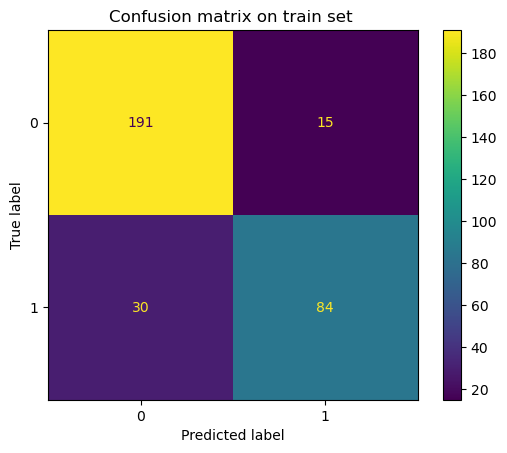

accuracy-score on train set :  0.859375


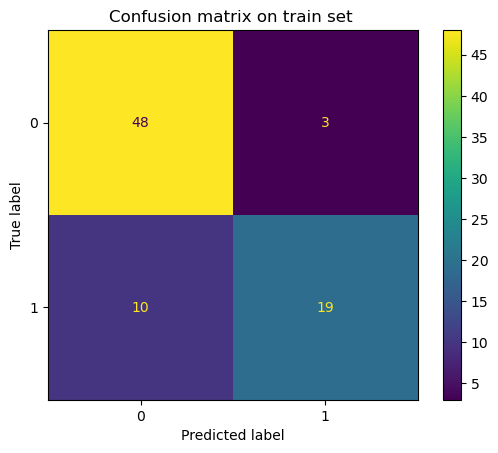

accuracy-score on test set :  0.8375


In [12]:
### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))


In [13]:
# Check coefficients 

print("Coefficients are               : ", classifier.coef_) 
print("Constant is                    : ", classifier.intercept_)

# Access transformers from feature_encoder
print("All transformers are           : ", feature_encoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is : ", feature_encoder.transformers_[0][1])

# Print categories
categorical_column_names = feature_encoder.transformers_[0][1].categories_
print("Categorical columns are        : ", categorical_column_names)

# Print numerical columns
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("Numerical columns are          : ", numerical_column_names)

# Append all columns 
# all_column_names = np.append(categorical_column_names, numerical_column_names)
all_column_names = X.columns
print("All column names are           : ", all_column_names)

# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients" : classifier.coef_.squeeze() # CAREFUL HERE. We need to access first index of our list because 
                                                # Data needs to be 1 dimensional
                                                # That's what .squeeze() is for
})

feature_importance

Coefficients are               :  [[0.35932859 2.22108897 1.08620362]]
Constant is                    :  [-1.27921518]
All transformers are           :  [('cat', OneHotEncoder(drop='first'), [0]), ('num', StandardScaler(), [1, 2])]
One Hot Encoder transformer is :  OneHotEncoder(drop='first')
Categorical columns are        :  [array(['Female', 'Male'], dtype=object)]
Numerical columns are          :  Index(['Age', 'EstimatedSalary'], dtype='object')
All column names are           :  Index(['Gender', 'Age', 'EstimatedSalary'], dtype='object')


,feature_names,coefficients
0,Gender,0.359329
1,Age,2.221089
2,EstimatedSalary,1.086204


👋 Here we can interpret your coefficient this way: 

$$ 
y = \frac{1}{1+e^{-0.19 \times Female + 0.19 \times Male + 2.2 \times Age + 1.08 \times EstimatedSalary - 1.10}}
$$

Now we can visualize it using `seaborn`

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

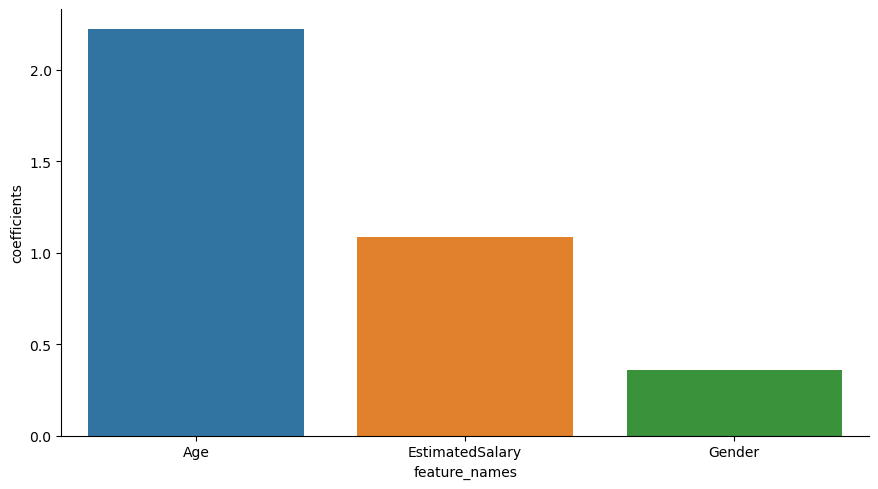

In [14]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph

## Step 2 - Build a Decision Tree 🌳

Let's now create your model. With `sklearn`, you'll see that it's not that long! 

In [15]:
# Training model
print("Training model...")
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [16]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [17]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



## Step 3 - Evaluate your model 🌡️

Now, we can visualize our results and evaluate our model. Visualizing in graph is optional because depending on your model, it will be harder to build a 2D graph. However, we can always evaluate performance using a metric. 

For classifications, we often use the accuracy score along with a [*confusion matrix*](https://en.wikipedia.org/wiki/Confusion_matrix). Let's do that using `sklearn` again. To evaluate our model, we will try to compare on the train set and on the test set. 

--- Assessment of performances ---


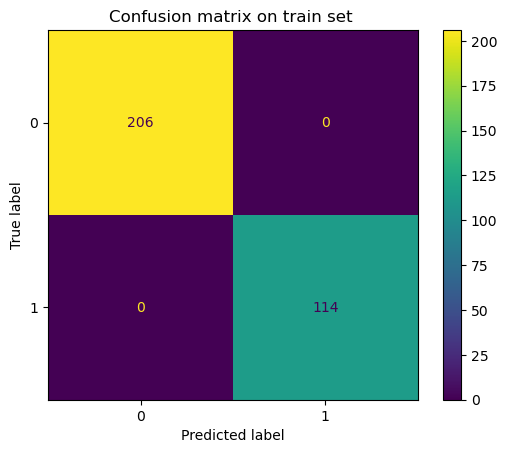

accuracy-score on train set :  1.0


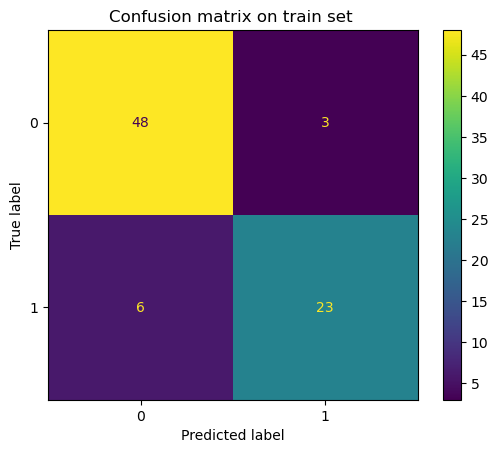

accuracy-score on test set :  0.8875


In [18]:
### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

## Step 4 - Feature importance 🥕

Finally, what is interesting would be to see which features are important in your model. With Decision Trees and Random Forest, it is going to be extremely simple:

In [19]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifier.feature_importances_
                                        
})

feature_importance

,feature_names,coefficients
0,Gender,0.030205
1,Age,0.526447
2,EstimatedSalary,0.443348


Feature importance is here determined using Gini coefficient. It's a little too complex at this point but feel free to [check out documentation](https://scikit-learn.org/stable/modules/tree.html#classification-criteria) if you are curious.

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

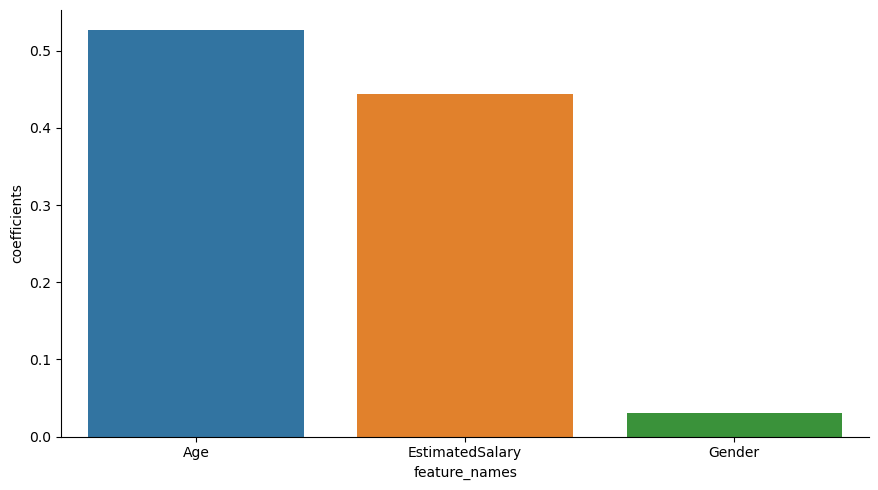

In [20]:
# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph

## Step 2 - Random forests 🌳🌳🌳🌳

This is a more complex model: you'll probably need to tune `n_estimators`

In [21]:
# Training model
print("Training model...")
classifier = RandomForestClassifier(n_estimators = 30)
classifier.fit(X_train, y_train)
print("...Done.")

Training model...
...Done.


In [22]:
# Predictions on training set
print("Predictions on train set...")
y_train_pred = classifier.predict(X_train)
print("...Done.")
print()

Predictions on train set...
...Done.



In [23]:
# Predictions on training set
print("Predictions on test set...")
y_test_pred = classifier.predict(X_test)
print("...Done.")
print()

Predictions on test set...
...Done.



## Step 3 - Evaluate your model 🌡️

Now, we can visualize our results and evaluate our model. Visualizing in graph is optional because depending on your model, it will be harder to build a 2D graph. However, we can always evaluate performance using a metric. 

For classifications, we often use the accuracy score along with a [*confusion matrix*](https://en.wikipedia.org/wiki/Confusion_matrix). Let's do that using `sklearn` again. To evaluate our model, we will try to compare on the train set and on the test set. 

--- Assessment of performances ---


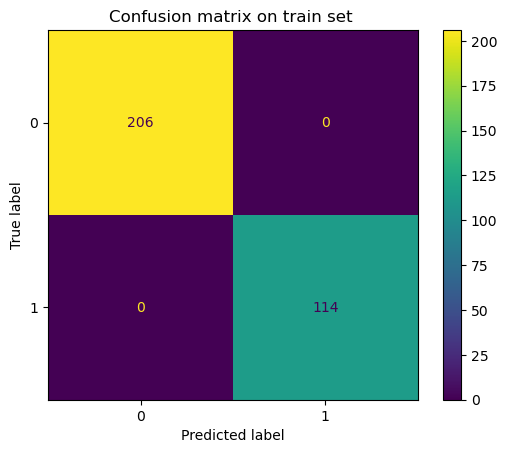

accuracy-score on train set :  1.0


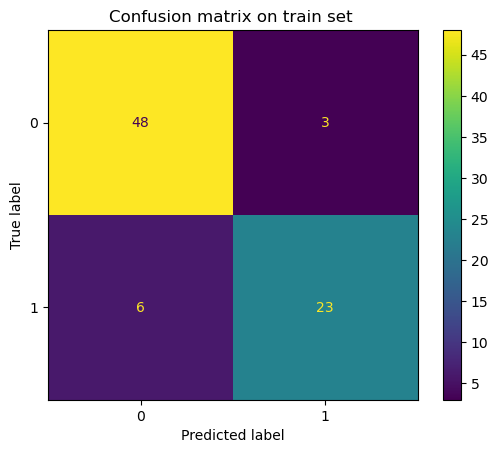

accuracy-score on test set :  0.8875


In [24]:
### Assessment of performances ###
print("--- Assessment of performances ---")

# Plot confusion matrix
cm = confusion_matrix(y_train, y_train_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on train set : ", classifier.score(X_train, y_train))


cm = confusion_matrix(y_test, y_test_pred, labels=classifier.classes_)
cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
cm_display.ax_.set_title("Confusion matrix on train set ") # Simply to set a title
plt.show() # Show graph
print("accuracy-score on test set : ", classifier.score(X_test, y_test))

## Step 4 - Feature importance 🥕

Finally, what is interesting would be to see which features are important in your model. With Decision Trees and Random Forest, it is going to be extremely simple:

In [25]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients": classifier.feature_importances_
                                        
})

feature_importance

,feature_names,coefficients
0,Gender,0.007882
1,Age,0.513477
2,EstimatedSalary,0.478641


Feature importance is here determined using Gini coefficient. It's a little too complex at this point but feel free to [check out documentation](https://scikit-learn.org/stable/modules/tree.html#classification-criteria) if you are curious.

c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\phili\anaconda3\envs\jedha\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Catego

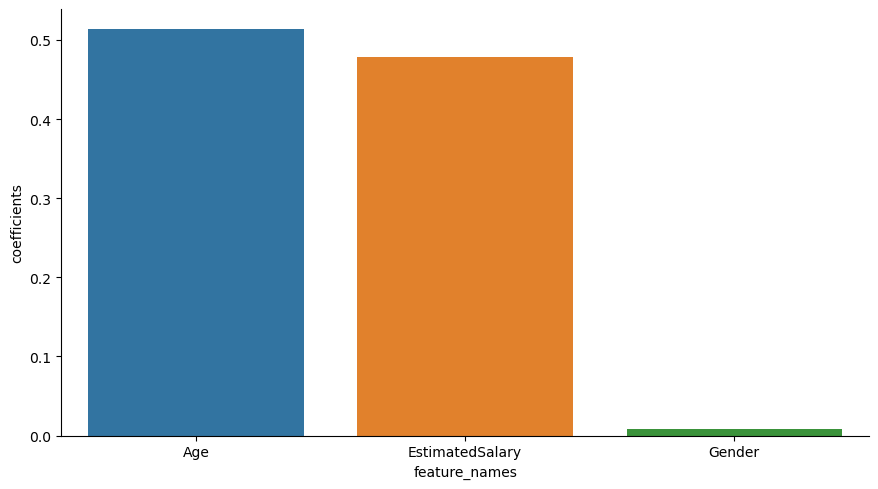

In [26]:
# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph